In [81]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import pandas as pd

In [82]:
class Config:
    def __init__(self):
        self.ROOT_DATA_DIR="FashionMNIST"
        self.EPOCH=100
        self.BATCH_SIZE=32
        self.LEARNING_RATE=0.001
        self.IMAGE_SIZE=(28,28)
        self.DEVICE="cuda" if torch.cuda.is_available() else "cpu"
        print(f"This notebook is using the device: {self.DEVICE}")
        self.SEED=2022
config=Config()

This notebook is using the device: cpu


In [83]:
# Donload the datasets
train_data=datasets.FashionMNIST(
    root=config.ROOT_DATA_DIR,
    train=True,
    download=True,
    transform=transforms.ToTensor()
)
test_data=datasets.FashionMNIST(
    root=config.ROOT_DATA_DIR,
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

In [84]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [85]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [86]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [87]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [88]:
given_label_map=train_data.class_to_idx
given_label_map

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [89]:
label_map={val:key for key,val in given_label_map.items()}
label_map

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [90]:
train_data.targets[7].item()

2

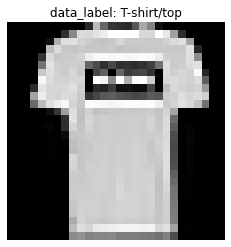

In [91]:
# Visualize one of the samples
def view_sample_img(data, idx, label_map):
    idx=1
    plt.imshow(train_data.data[idx], cmap="gray")
    plt.title(f"data_label: {label_map[train_data.targets[idx].item()]}")
    plt.axis("off")
view_sample_img(train_data,7,label_map)

In [92]:
# Create the DataLoader
train_data_loader=DataLoader(
    dataset=train_data,
    batch_size=config.BATCH_SIZE,
    shuffle=True
)
test_data_loader=DataLoader(
    dataset=test_data,
    batch_size=config.BATCH_SIZE,
    shuffle=False
)

In [93]:
for images, labels in test_data_loader:
    print(images.shape)
    print(labels.shape)
    break
    

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [94]:
images[0].shape

torch.Size([1, 28, 28])

In [95]:
images[0].squeeze().shape

torch.Size([28, 28])

In [96]:
images[0].squeeze().numpy()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

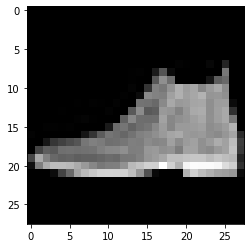

In [97]:
plt.imshow(images[0].squeeze(), cmap="gray")

In [98]:
images[0].shape, images[0].squeeze().shape,images[0].unsqueeze(dim=0).shape

(torch.Size([1, 28, 28]), torch.Size([28, 28]), torch.Size([1, 1, 28, 28]))

In [99]:
images[0].squeeze()

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [100]:
images[0].unsqueeze(dim=0)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [101]:
images[0].unsqueeze(dim=1)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [102]:
class CNN(nn.Module):
    def __init__(self, in_,out_):
        super(CNN, self).__init__()
        self.conv_pool_01=nn.Sequential(
            nn.Conv2d(in_channels=in_, out_channels=8, kernel_size=5, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_pool_02=nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16,kernel_size=5, stride=1, padding=0 ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.Flatten=nn.Flatten()
        self.FC_01=nn.Linear(in_features=16*4*4, out_features=128)
        self.FC_02=nn.Linear(in_features=128, out_features=64)
        self.FC_03=nn.Linear(in_features=64, out_features=out_)
    def forward(self,x):
        x=self.conv_pool_01(x)
        x=self.conv_pool_02(x)
        x=self.Flatten(x)
        x=F.relu(self.FC_01(x))
        x=F.relu(self.FC_02(x))
        x=F.relu(self.FC_03(x))
        return x
        

In [103]:
model=CNN(1,10)
print(model)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)


In [104]:
model.Flatten

Flatten(start_dim=1, end_dim=-1)

In [105]:
model.conv_pool_02

Sequential(
  (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [106]:
next(model.parameters()).is_cuda

False

In [107]:
model.to(config.DEVICE)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)

In [108]:
next(model.parameters()).is_cuda

False

In [109]:
def count_params(model):
    model_params={"Modules":list(),"Parameters":list()}
    total={"trainable":0, "non_trainable":0}
    for name, parameters in model.named_parameters():
        param=parameters.numel()# Checking neumerical value
        if not parameters.requires_grad:
            total["non_trainable"] +=param
            continue
        
        model_params["Modules"].append(name)
        model_params["Parameters"].append(param)
        total["trainable"] +=param
    df=pd.DataFrame(model_params)
    df=df.style.set_caption(f"Total trainable parameters: {total}")
    return df
    

In [110]:
count_params(model)

,Modules,Parameters
0,conv_pool_01.0.weight,200
1,conv_pool_01.0.bias,8
2,conv_pool_02.0.weight,3200
3,conv_pool_02.0.bias,16
4,FC_01.weight,32768
5,FC_01.bias,128
6,FC_02.weight,8192
7,FC_02.bias,64
8,FC_03.weight,640
9,FC_03.bias,10


In [111]:
60000/32

1875.0

In [112]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=config.LEARNING_RATE)

In [113]:
len(train_data_loader)# steps per epochs

1875

In [114]:
# Trining Loop
for epoch in range(config.EPOCH):
    with tqdm(train_data_loader) as tqdm_epoch:
        for images, labels in tqdm_epoch:
            tqdm_epoch.set_description(f"Epoch {epoch+1}/{config.EPOCH}")
            # put the images on device
            images=images.to(config.DEVICE)
            labels=labels.to(config.DEVICE)
            
            #forqward pass
            outputs=model(images)
            loss=criterion(outputs, labels)# passing the predicted and targets value
            # Backward propagations
            optimizer.zero_grad()# past gradient
            loss.backward()# calulate the gradient of each weights
            optimizer.step()# weight updated
            
            tqdm_epoch.set_postfix(loss=loss.item())
    

Epoch 100/100: 100%|████| 1875/1875 [00:43<00:00, 43.39it/s, loss=0.224]


In [115]:
os.makedirs("model_dir", exist_ok=True)
model_file_path=os.path.join("model_dir","CNN_model.pth")
torch.save(model, model_file_path)

In [116]:
#load the model
load_model=torch.load(model_file_path)

In [117]:
# Evaluate the model
pred=np.array([])
target=np.array([])
with torch.no_grad():
    for batch, data in enumerate(test_data_loader):
        images=data[0].to(config.DEVICE)
        labels=data[1].to(config.DEVICE)
        y_pred=model(images)
        pred=np.concatenate((pred, torch.argmax(y_pred,1).cpu().numpy()))
        target=np.concatenate((target, labels.cpu().numpy()))

In [118]:
# Comfusion matrix
cm=confusion_matrix(target, pred)
cm

array([[815,   3,  25,  26,   6,   1, 114,   0,  10,   0],
       [  1, 978,   0,  14,   4,   0,   2,   0,   1,   0],
       [ 19,   1, 863,   6,  56,   0,  52,   0,   3,   0],
       [ 17,  10,  15, 879,  41,   0,  37,   0,   1,   0],
       [  6,   1,  90,  29, 805,   0,  68,   0,   1,   0],
       [ 20,   0,   0,   0,   0, 958,   0,  21,   1,   0],
       [102,   3, 116,  23,  74,   0, 669,   0,  13,   0],
       [ 32,   0,   0,   0,   0,  14,   0, 954,   0,   0],
       [  8,   1,   5,   6,   4,   0,   9,   2, 965,   0],
       [951,   0,   0,   0,   0,   3,   1,  45,   0,   0]], dtype=int64)

<AxesSubplot:>

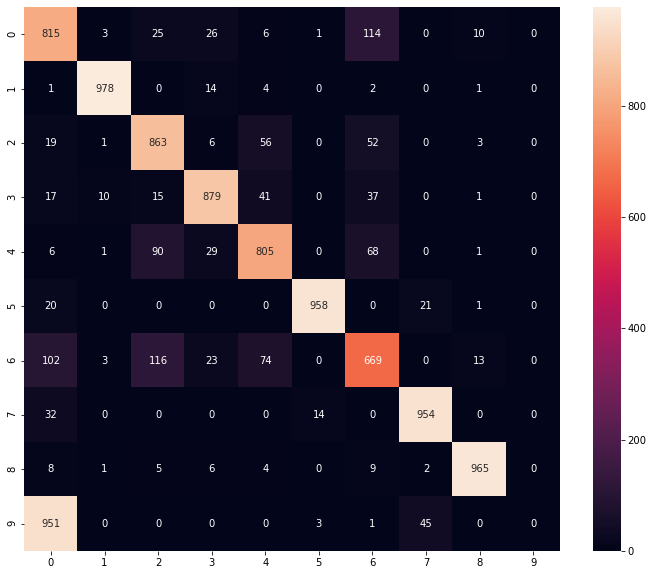

In [119]:
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d')

<AxesSubplot:>

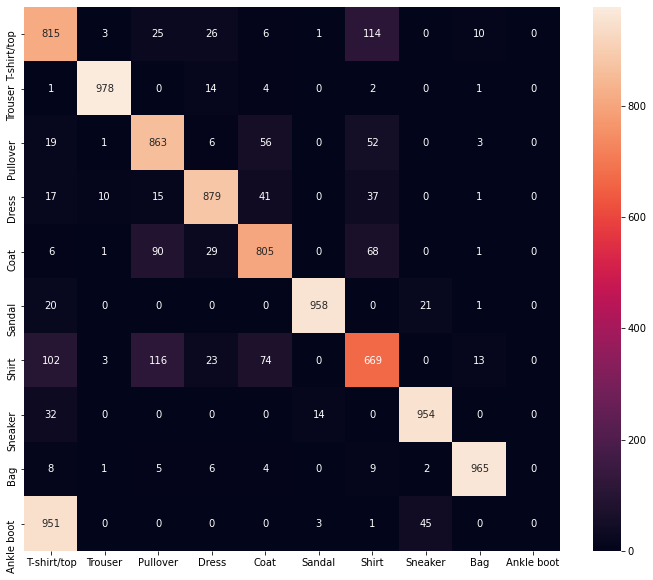

In [121]:
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d',xticklabels=label_map.values(),yticklabels=label_map.values())

In [120]:
label_map

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [122]:
data=next(iter(test_data_loader))

In [123]:
data

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

In [124]:
len(data)

2

In [125]:
images, labels=data

In [126]:
images.shape

torch.Size([32, 1, 28, 28])

In [127]:
idx=2
img=images[idx]
img.shape


torch.Size([1, 28, 28])

In [133]:
label=labels[idx]
label_map[label.item()]

'Trouser'

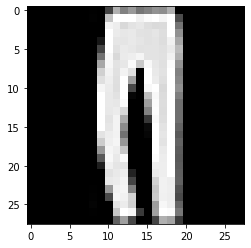

In [130]:
plt.imshow(img.squeeze(), cmap="gray")

In [136]:
img.unsqueeze(dim=1).shape

torch.Size([1, 1, 28, 28])

In [138]:
logit=model(img.unsqueeze(dim=1).to(config.DEVICE))
logit

tensor([[  0.0000, 199.5663,   8.9984,  73.9927,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000]], grad_fn=<ReluBackward0>)

In [139]:
sum([0.0000, 199.5663,   8.9984,  73.9927,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000])

282.55740000000003

In [142]:
predicted_proba=F.softmax(logit, dim=1)

In [144]:
argmax=torch.argmax(predicted_proba).item()
argmax

1

In [145]:
label_map[argmax]

'Trouser'

In [148]:
def predict(data, model, label_map, device, idx=0):
    images, labels=data
    img=images[idx]
    label=labels[idx]
    plt.imshow(img.squeeze(), cmap="gray")
    logit=model(img.unsqueeze(dim=1).to(config.DEVICE))
    predicted_proba=F.softmax(logit, dim=1)
    argmax=torch.argmax(predicted_proba).item()
    predicted_label=label_map[argmax]
    actual_label=label_map[label.item()]
    plt.title(f"actual: {actual_label} | predicted: {predicted_label}")
    return predicted_label, actual_label


('Trouser', 'Trouser')

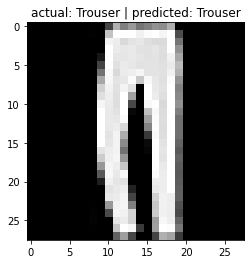

In [149]:
predict(data, model, label_map, config.DEVICE,idx=2)